In [1]:
import pandas as pd

In [2]:
src = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

In [3]:
# by state
df = pd.read_csv(src)
df = df[df['Country/Region'] == 'US']
df = df[~df['Province/State'].str.contains(',')]
df = df[~df['Province/State'].str.contains('Princess')]
df.reset_index()

,index,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,100,Washington,US,47.4009,-121.4905,0,0,0,0,0,...,0,0,0,0,0,0,0,0,267,366
1,101,New York,US,42.1657,-74.9481,0,0,0,0,0,...,0,0,0,0,0,0,0,0,173,220
2,102,California,US,36.1162,-119.6816,0,0,0,0,0,...,0,0,0,0,0,0,0,0,144,177
3,103,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,92,95
4,106,Georgia,US,33.0406,-83.6431,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,23
5,107,Colorado,US,39.0598,-105.3111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,34
6,108,Florida,US,27.7663,-81.6868,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,28
7,109,New Jersey,US,40.2989,-74.5210,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,23
8,110,Oregon,US,44.5720,-122.0709,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,19
9,111,Texas,US,31.0545,-97.5635,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,21


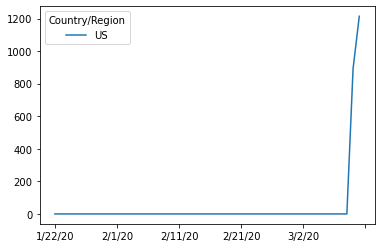

In [4]:
df = df.groupby(['Country/Region']).sum()
df = df.drop(['Lat', 'Long'], axis=1)
df = df.T
df.plot()